# Modflow Debug GUI

Load formatting extension

In [1]:
%load_ext lab_black

Set matplotlib backend

In [2]:
%matplotlib inline

In [3]:
import os
from pathlib import Path
import subprocess

import numpy as np
import matplotlib.pyplot as plt
import flopy
import flopy.utils.binaryfile as bf

flopy is installed in C:\Users\hofer_jn\AppData\Local\Continuum\anaconda3\lib\site-packages\flopy


In [4]:
modflow_path = Path("c:/checkouts/modflow6/bin/mf6d.exe")
example_path = Path("c:/checkouts/modflow-debug-gui/data/test120_mv_dis-lgr_3models")

Change directory into example path

In [5]:
os.chdir(example_path)

Running modflow with Flopy does not work yet

In [6]:
# modelname = "mv"
# mf = flopy.modflow.Modflow(modelname, exe_name=str(modflow_path))
# success, buff = mf.run_model()

Run modflow directly and print potential errors

In [7]:
completed_process = subprocess.run([str(modflow_path)], stdout=subprocess.PIPE)
if completed_process.returncode:
    print(completed_process.stdout.decode("utf-8"))

In [13]:
hds_mv = bf.HeadFile("mv.hds")
hds_child1 = bf.HeadFile("child1.hds")
hds_child2 = bf.HeadFile("child2.hds")

head_mv = hds_mv.get_data(totim=1.0)
head_child1 = hds_child1.get_data(totim=1.0)
head_child2 = hds_child2.get_data(totim=1.0)

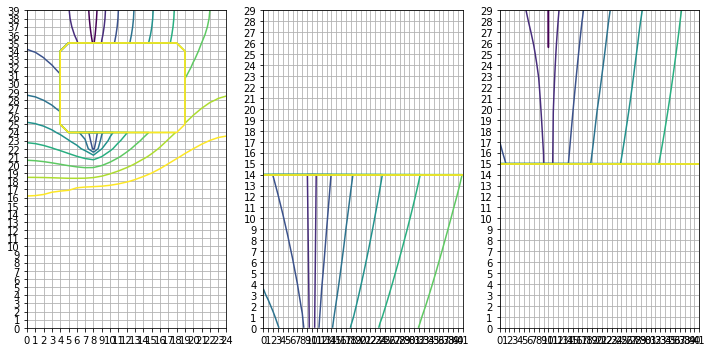

In [37]:
plt.figure(figsize=(10, 5))
levels = np.arange(1, 10, 1)

plt.subplot(1, 3, 1)
plt.contour(head_mv[0, :, :], levels=levels)
plt.yticks(np.arange(0, len(head_mv[0, :, 0])))
plt.xticks(np.arange(0, len(head_mv[0, 0, :])))
plt.grid()

plt.subplot(1, 3, 2)
plt.contour(head_child1[0, :, :], levels=levels)
plt.yticks(np.arange(0, len(head_child1[0, :, 0])))
plt.xticks(np.arange(0, len(head_child1[0, 0, :])))
plt.grid()

plt.subplot(1, 3, 3)
plt.contour(head_child2[0, :, :], levels=levels)
plt.yticks(np.arange(0, len(head_child2[0, :, 0])))
plt.xticks(np.arange(0, len(head_child2[0, 0, :])))
plt.grid()

plt.tight_layout()
plt.show()

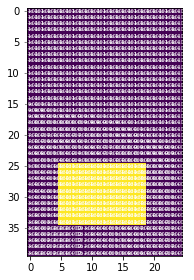

In [11]:
# plt.figure(figsize=(20, 5))

# plt.subplot(1, 3, 1, aspect="equal")
hds = bf.HeadFile("mv.hds")
head = hds.get_data(totim=1.0)
levels = np.arange(1, 10, 1)
plt.imshow(head[0, :, :])

for i in range(len(head[0, 0, :])):
    for j in range(len(head[0, :, 0])):
        text = plt.text(
            i,
            j,
            f"{head[0, j, i]:02.0}",
            ha="center",
            va="center",
            color="w",
            fontsize=5,
        )


# plt.subplot(1, 3, 2)
# hds = bf.HeadFile("child1.hds")
# head = hds.get_data(totim=1.0)
# levels = np.arange(1, 10, 1)
# plt.imshow(head[0, :, :])

# plt.subplot(1, 3, 3)
# hds = bf.HeadFile("child2.hds")
# head = hds.get_data(totim=1.0)
# levels = np.arange(1, 10, 1)
# plt.imshow(head[0, :, :])
# plt.colorbar()

plt.tight_layout()
plt.show()

In [10]:
hds = bf.HeadFile("mv.hds")
head = hds.get_data(totim=1.0)
print(len(head[:, 0, 0]))
print(len(head[0, :, 0]))
print(len(head[0, 0, :]))

5
40
25
